### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Loading

In [ ]:
df = pd.read_csv('./ParisHousing.csv')

### Data Overview

In [4]:
#Displaying the first few rows
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [5]:
print("Total no of rows:", df.shape[0])

Total no of rows: 10000


In [6]:
print("Total no of columns:", df.shape[1])

Total no of columns: 17


In [7]:
df.columns.values.tolist()

['squareMeters',
 'numberOfRooms',
 'hasYard',
 'hasPool',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'basement',
 'attic',
 'garage',
 'hasStorageRoom',
 'hasGuestRoom',
 'price']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [9]:
#General Statistics
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [10]:
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

### Data Preprocessing

In [11]:
#Checking for null values
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

### Exploratory Data Analysis (EDA)

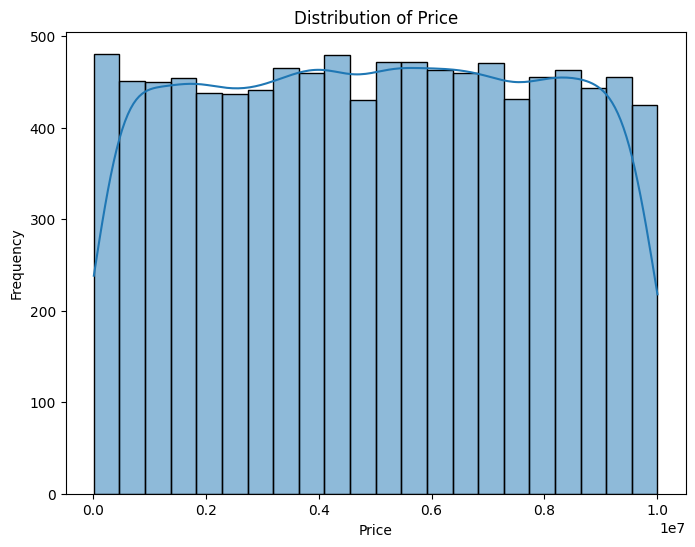

In [12]:
# Distribution of price
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='count'>

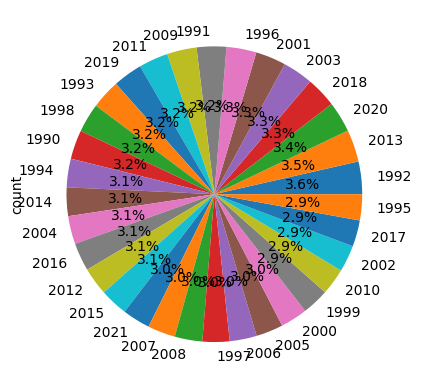

In [13]:
df['made'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='Frequency'>

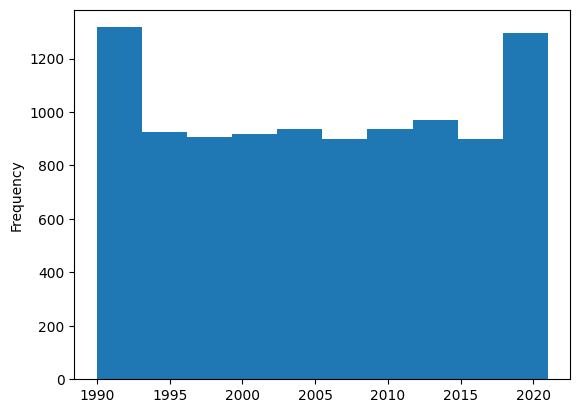

In [14]:
df['made'].plot.hist(bins=10)

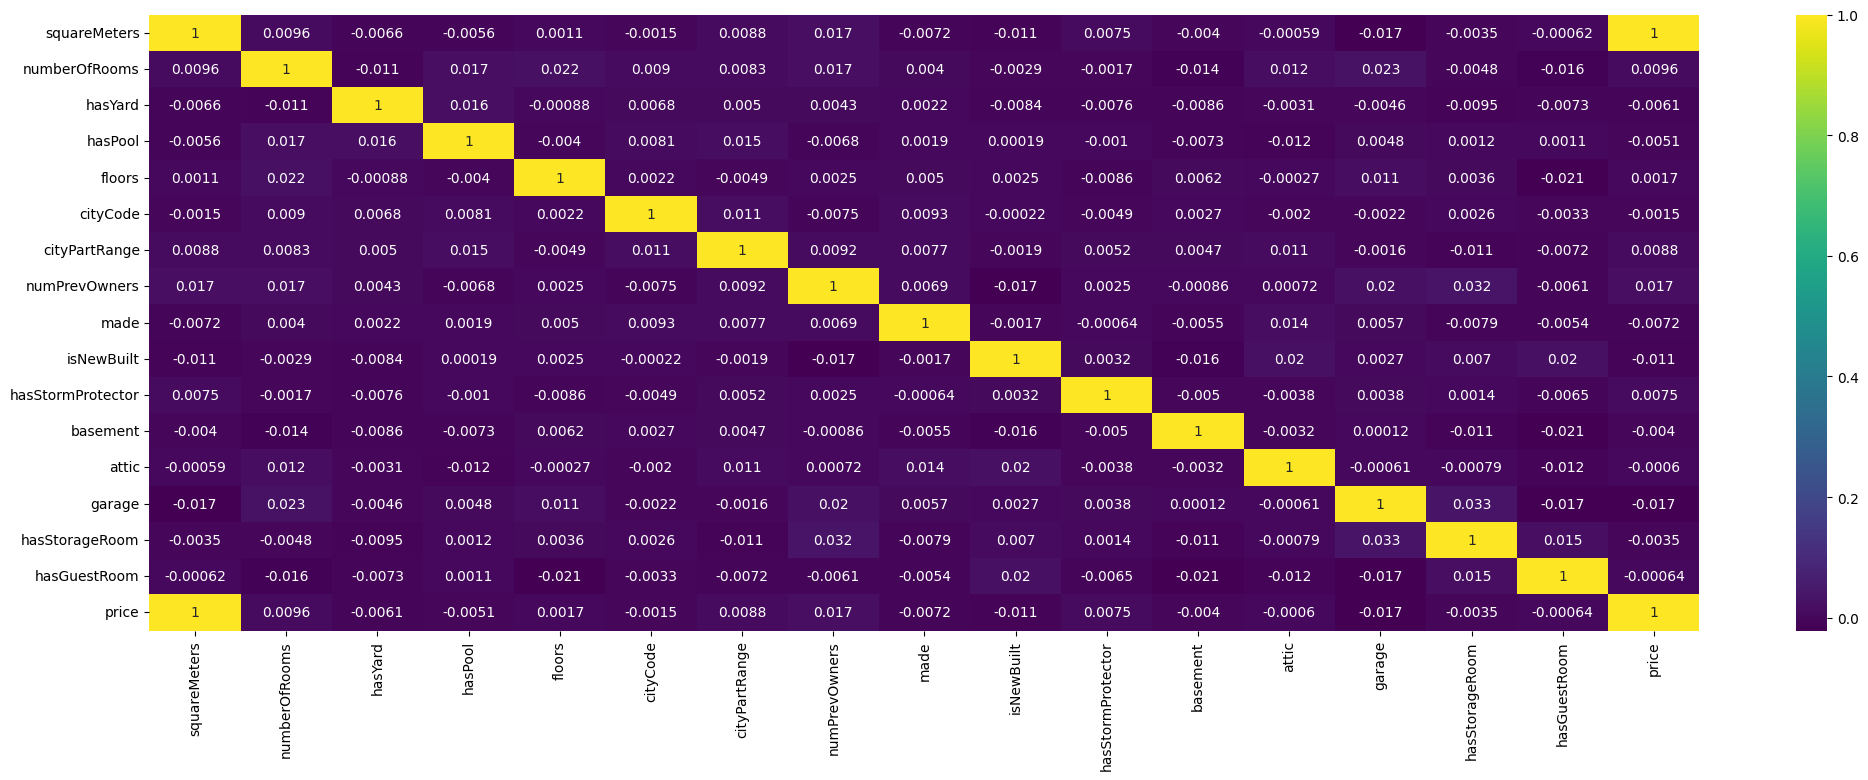

In [15]:
#Heatmap to show correlation between different features and target variable
plt.figure(figsize=(25, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

### Feature Selection

In [43]:
# Select features and target variable from the DataFrame
X = df[df.columns.drop('price')]
Y = df['price']

### Data Splitting

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 22520236)

### Model Generation

In [46]:
model_no_intercept = LinearRegression(fit_intercept=False)
model_with_intercept = LinearRegression(fit_intercept=True)

model_no_intercept.fit(X_train, Y_train)



LinearRegression(fit_intercept=False)

In [47]:
model_with_intercept.fit(X_train, Y_train)

LinearRegression()

In [48]:
Y_no_intercept_pred = model_no_intercept.predict(X_test)
Y_with_intercept_pred = model_with_intercept.predict(X_test)

### Prediction

In [49]:
# Define and assign values to the variables for the new house
new_square_meters = 75523
new_number_of_rooms = 4  
new_has_yard = 1  
new_has_pool = 0  
new_floors = 2 
new_city_code = 9373 
new_city_part_range = 3 
new_num_prev_owners = 1  
new_construction_year = 2020  
new_is_new_built = 1  
new_has_storm_protector = 1  
new_basement = 0  
new_attic = 1  
new_garage = 1 
new_has_storage_room = 1  
new_has_guest_room = 0 

In [50]:
# Create a DataFrame for the new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    
})

predict home price with model no fit intercept

In [58]:
# Now we can proceed with making predictions using the trained model
predicted_price =model_no_intercept.predict(new_house_features)
print(f"the Predicted Price: Rs {predicted_price[0]:.2f}")

the Predicted Price: Rs 7556131.65


predict home price with model no fit intercept

In [52]:
predicted_price =model_with_intercept.predict(new_house_features)
print(f"the Predicted Price: Rs {predicted_price[0]:.2f}")

the Predicted Price: Rs 7556100.42


### Model Evaluation

evaluate model with  fit_intercept = false

In [53]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_no_intercept_pred)
mse = mean_squared_error(Y_test, Y_no_intercept_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1482.6307064419143
Mean Squared Error: 3624486.1899424735
Root Mean Squared Error: 1903.8083385526163


evaluate model with  fit_intercept = true

In [54]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_with_intercept_pred)
mse = mean_squared_error(Y_test, Y_with_intercept_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1482.9220391047188
Mean Squared Error: 3623849.291655446
Root Mean Squared Error: 1903.6410616645792


### Visualising the results

plot result with fit_intercept = false

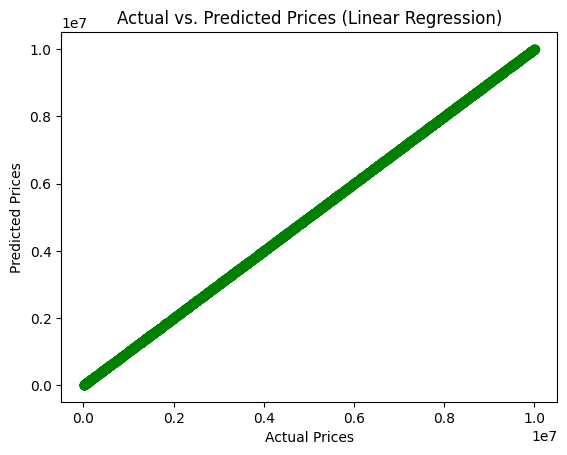

In [55]:
# Plotting the actual prices vs. predicted prices
plt.scatter(Y_test, Y_no_intercept_pred , color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.show()

plot result with fit_intercept = true

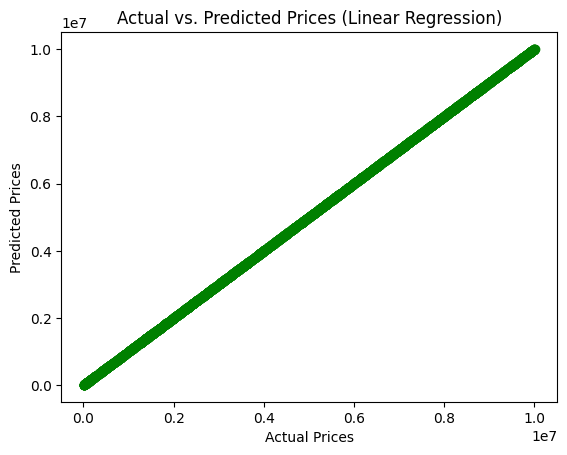

In [56]:
# Plotting the actual prices vs. predicted prices
plt.scatter(Y_test, Y_with_intercept_pred , color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.show()